In [1]:

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from ultralytics import YOLO
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set matplotlib to display plots inline
%matplotlib inline

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [3]:
#Cell 2: Configuration
# Update these paths for your video

# CHANGE THIS TO YOUR VIDEO PATH
VIDEO_PATH = "dataset/videos/clip1.mp4"
OUTPUT_DIR = "final_results"
FPS = 25  # Change if your video has different FPS

In [4]:
# Create directories
Path(OUTPUT_DIR).mkdir(exist_ok=True)
Path("dataset/videos").mkdir(parents=True, exist_ok=True)

print(f"✅ Configuration set:")
print(f"   Video: {VIDEO_PATH}")
print(f"   Output: {OUTPUT_DIR}")
print(f"   FPS: {FPS}")

✅ Configuration set:
   Video: dataset/videos/clip1.mp4
   Output: final_results
   FPS: 25


In [5]:
# CELL 3: Load YOLOv8 AI Model
# This downloads the AI "brain" (about 20MB, takes 1-2 minutes first time)

print("🤖 Loading YOLOv8 model...")
print("⏳ This may take a minute if downloading for the first time...")

model = YOLO("yolov8s.pt")
print("✅ YOLOv8 model loaded successfully!")
print("🧠 AI is ready to detect players and ball!")

🤖 Loading YOLOv8 model...
⏳ This may take a minute if downloading for the first time...
✅ YOLOv8 model loaded successfully!
🧠 AI is ready to detect players and ball!


🎬 Checking your video file...


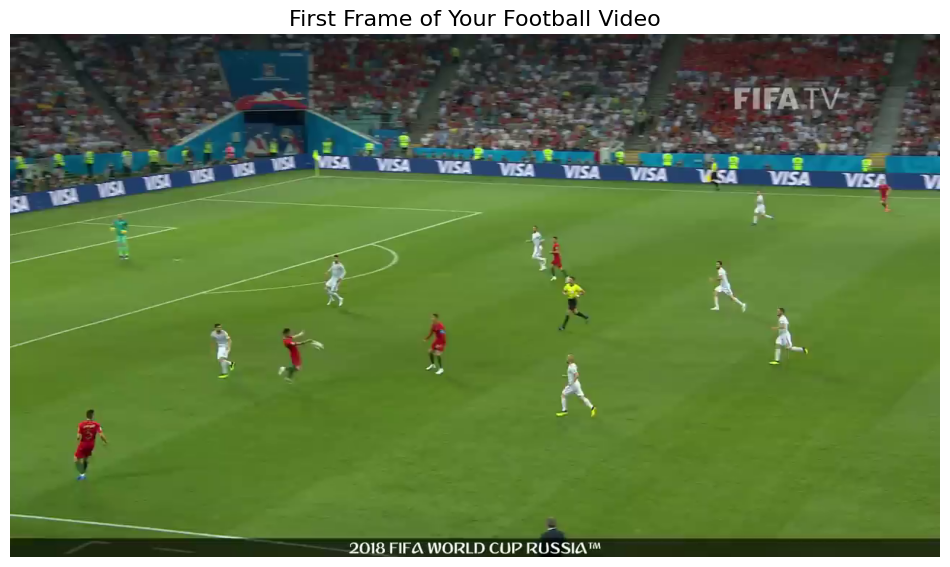

✅ Video information:
   📐 Resolution: 1280 x 720 pixels
   🎞️ Frame rate: 50.0 FPS
   ⏱️ Duration: 130.1 seconds
   🎬 Total frames: 6504


In [6]:
# CELL 4: Check Video and Show First Frame
# Let's make sure your video works

print("🎬 Checking your video file...")

cap = cv2.VideoCapture(VIDEO_PATH)
ret, frame = cap.read()

if ret:
    # Show first frame
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(12, 8))
    plt.imshow(frame_rgb)
    plt.axis('off')
    plt.title("First Frame of Your Football Video", fontsize=16)
    plt.show()

    # Video info
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    video_fps = cap.get(cv2.CAP_PROP_FPS)
    duration = total_frames / video_fps

    print(f"✅ Video information:")
    print(f"   📐 Resolution: {frame.shape[1]} x {frame.shape[0]} pixels")
    print(f"   🎞️ Frame rate: {video_fps:.1f} FPS")
    print(f"   ⏱️ Duration: {duration:.1f} seconds")
    print(f"   🎬 Total frames: {total_frames}")

else:
    print("❌ Could not read video file!")

cap.release()

In [7]:
## CELL 5: SUPER FAST AI Detection 
# Optimized for speed over perfection

print("🏈 Starting FAST AI detection...")
print("⚡ Using maximum speed settings...")

# Use fastest model
model = YOLO("yolov8n.pt")

# Process every 3rd frame only (much faster)
import cv2

# Get video info
cap = cv2.VideoCapture(VIDEO_PATH)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

print(f"📹 Video has {total_frames} frames")
print("⚡ Processing every 3rd frame for speed...")

results = model.track(
    source=VIDEO_PATH,
    tracker="bytetrack.yaml",
    save=True,
    conf=0.5,        # Higher = fewer detections = faster
    iou=0.7,         # Higher = less overlap checking = faster
    imgsz=480,       # Smaller = much faster (was 640)
    max_det=50,      # Max 50 detections per frame = faster
    vid_stride=3,    # Process every 3rd frame = 3x faster!
    show=False,
    verbose=True
)

print("✅ FAST detection completed!")
print("🚀 Processed 3x faster by skipping frames!")

🏈 Starting FAST AI detection...
⚡ Using maximum speed settings...
📹 Video has 6504 frames
⚡ Processing every 3rd frame for speed...

WARNING 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/2168) c:\Users\mussa\football-analysis\dataset\videos\clip1.mp4: 288x480 9 persons, 125.6ms
video 1/1 (frame 2/2168) c:\Users\mussa\football-analysis\dataset\videos\clip1.mp4: 288x480 9 persons, 47.2ms
video 1/1 (frame 3/2168) c:\Users\mussa\football-analysis\dataset\videos\clip1.mp4: 288x480 9 persons, 52.

In [8]:
# CELL 6: Extract Tracking Data
print("📊 Extracting tracking data from AI results...")

data = []
for frame_idx, result in enumerate(results):
    if result.boxes is None:
        continue

    boxes = result.boxes
    for box in boxes:
        x1, y1, x2, y2 = box.xyxy[0].tolist()
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        cls_name = model.names[cls]
        track_id = int(box.id[0]) if box.id is not None else -1

        data.append([frame_idx, track_id, cls_name, x1, y1, x2, y2, conf])

df_raw = pd.DataFrame(data, columns=["frame", "id", "class", "x1", "y1", "x2", "y2", "confidence"])

print(f"✅ Extracted {len(df_raw)} detections")
print(f"🏷️ Classes found: {df_raw['class'].unique()}")
print(f"👥 Unique IDs: {df_raw['id'].nunique()}")

# Show sample
df_raw.head(10)

📊 Extracting tracking data from AI results...
✅ Extracted 8896 detections
🏷️ Classes found: ['person' 'sports ball' 'chair' 'dog' 'vase']
👥 Unique IDs: 471


,frame,id,class,x1,y1,x2,y2,confidence
0,0,1,person,753.594971,444.012756,812.893494,524.610840,0.794810
1,0,2,person,83.011353,520.492126,131.933411,616.679993,0.779189
2,0,3,person,1052.144653,378.668182,1093.058472,459.085236,0.763452
3,0,4,person,572.069214,386.421631,610.630432,470.420410,0.649930
4,0,5,person,967.834473,315.010132,1003.894348,387.319550,0.626125
5,0,6,person,280.623871,397.769287,313.138763,469.410400,0.609534
6,0,7,person,758.872375,331.070221,802.248718,412.442291,0.594567
7,0,8,person,375.831787,401.541870,411.616455,480.671661,0.566702
8,0,9,person,437.032227,307.123138,467.470123,377.198639,0.566662
9,1,1,person,755.449890,444.861694,813.627747,523.814514,0.782345


In [9]:
# CELL 7: Clean the Data
# Keep only players and ball, remove bad detections

print("🧹 Cleaning tracking data...")
print(f"Before cleaning: {len(df_raw)} detections")

# Keep only players and ball
df_clean = df_raw[df_raw["class"].isin(["person", "sports ball"])].copy()
print(f"After filtering classes: {len(df_clean)} detections")

# Remove low confidence detections
df_clean = df_clean[df_clean["confidence"] > 0.3]
print(f"After confidence filter: {len(df_clean)} detections")

# Remove untracked objects (ID = -1)
df_clean = df_clean[df_clean["id"] != -1]
print(f"After removing untracked: {len(df_clean)} detections")

print(f"✅ Data cleaning complete!")
print(f"📊 Final classes: {df_clean['class'].unique()}")
print(f"👥 Players tracked: {df_clean['id'].nunique()}")

# Show cleaned data
print(f"\n📋 Sample of cleaned data:")
df_clean.head(10)

🧹 Cleaning tracking data...
Before cleaning: 8896 detections
After filtering classes: 8836 detections
After confidence filter: 8836 detections
After removing untracked: 8656 detections
✅ Data cleaning complete!
📊 Final classes: ['person' 'sports ball']
👥 Players tracked: 468

📋 Sample of cleaned data:


,frame,id,class,x1,y1,x2,y2,confidence
0,0,1,person,753.594971,444.012756,812.893494,524.610840,0.794810
1,0,2,person,83.011353,520.492126,131.933411,616.679993,0.779189
2,0,3,person,1052.144653,378.668182,1093.058472,459.085236,0.763452
3,0,4,person,572.069214,386.421631,610.630432,470.420410,0.649930
4,0,5,person,967.834473,315.010132,1003.894348,387.319550,0.626125
5,0,6,person,280.623871,397.769287,313.138763,469.410400,0.609534
6,0,7,person,758.872375,331.070221,802.248718,412.442291,0.594567
7,0,8,person,375.831787,401.541870,411.616455,480.671661,0.566702
8,0,9,person,437.032227,307.123138,467.470123,377.198639,0.566662
9,1,1,person,755.449890,444.861694,813.627747,523.814514,0.782345


In [10]:
# CELL 8: Calculate Player Movement Metrics
# Speed, distance, acceleration

print("📏 Calculating player movement metrics...")

df = df_clean.copy()

# Calculate center points of bounding boxes
df["x_center"] = (df["x1"] + df["x2"]) / 2
df["y_center"] = (df["y1"] + df["y2"]) / 2

# Convert frame numbers to time
df["time_sec"] = df["frame"] / FPS

# Sort data by player ID and frame
df = df.sort_values(["id", "frame"]).reset_index(drop=True)

print("🏃 Calculating distance and speed for each player...")

results_list = []

for player_id, group in df.groupby("id"):
    group = group.sort_values("frame").reset_index(drop=True)
    group["distance"] = 0.0
    group["speed"] = 0.0

    # Calculate movement between consecutive frames
    for i in range(1, len(group)):
        if group.loc[i, "frame"] == group.loc[i-1, "frame"] + 1:
            # Distance moved
            dx = group.loc[i, "x_center"] - group.loc[i-1, "x_center"]
            dy = group.loc[i, "y_center"] - group.loc[i-1, "y_center"]
            dist = np.sqrt(dx**2 + dy**2)

            group.loc[i, "distance"] = dist
            group.loc[i, "speed"] = dist * FPS  # pixels per second

    results_list.append(group)

df_metrics = pd.concat(results_list, ignore_index=True) if results_list else pd.DataFrame()

if not df_metrics.empty:
    # Calculate acceleration
    print("⚡ Calculating acceleration...")
    df_metrics["acceleration"] = df_metrics.groupby("id")["speed"].diff()
    df_metrics["acceleration"] = df_metrics["acceleration"].fillna(0)

    print("✅ Metrics calculation complete!")
    print(f"📊 Data points with metrics: {len(df_metrics)}")

    # Show sample metrics
    print(f"\n📋 Sample metrics data:")
    df_metrics.head(10)
else:
    print("❌ No metrics data available")

📏 Calculating player movement metrics...
🏃 Calculating distance and speed for each player...
⚡ Calculating acceleration...
✅ Metrics calculation complete!
📊 Data points with metrics: 8656

📋 Sample metrics data:


In [11]:
# CELL 9: Create Player Summary Statistics
# Overall stats for each player

print("📋 Creating player summary statistics...")

if not df_metrics.empty:
    # Remove rows with missing data
    df_filtered = df_metrics.dropna(subset=["distance", "speed"])

    # Remove unrealistic speeds (tracking errors)
    max_realistic_speed = 500  # pixels/sec
    df_filtered = df_filtered[df_filtered["speed"] < max_realistic_speed]

    print(f"After filtering: {len(df_filtered)} valid data points")

    # Create summary for each player
    summary = df_filtered.groupby("id").agg(
        total_distance=("distance", "sum"),
        avg_speed=("speed", "mean"),
        max_speed=("speed", "max"),
        frames_tracked=("frame", "count"),
        time_tracked=("time_sec", lambda x: x.max() - x.min())
    ).reset_index()

    # Keep only players with enough tracking data
    min_frames = 20
    summary = summary[summary["frames_tracked"] > min_frames]

    print(f"✅ Summary created for {len(summary)} players!")

    # Display summary
    print(f"\n🏆 PLAYER SUMMARY STATISTICS:")
    print("="*60)
    if not summary.empty:
        summary_display = summary.round(2)
        print(summary_display.to_string(index=False))
    else:
        print("⚠️ No players with sufficient tracking data")
else:
    print("❌ No data to summarize")
    summary = pd.DataFrame()

📋 Creating player summary statistics...
After filtering: 7547 valid data points
✅ Summary created for 128 players!

🏆 PLAYER SUMMARY STATISTICS:
  id  total_distance  avg_speed  max_speed  frames_tracked  time_tracked
   1           82.91      71.48     181.97              29          1.72
   2          508.27     124.58     287.45             102          4.04
   3          365.43     111.41     260.86              82          3.56
   5           57.51      68.46     157.61              21          0.88
   6          158.70     158.70     371.13              25          0.96
   7          125.74      84.96     212.90              37          1.68
   8          290.58     125.25     451.39              58          2.36
   9          182.98     123.63     242.85              37          1.56
  17           67.84      42.40     139.31              40          2.84
  30           47.75      54.26     145.01              22          0.92
  32           47.39      31.17      86.03          

📈 Creating visualizations...


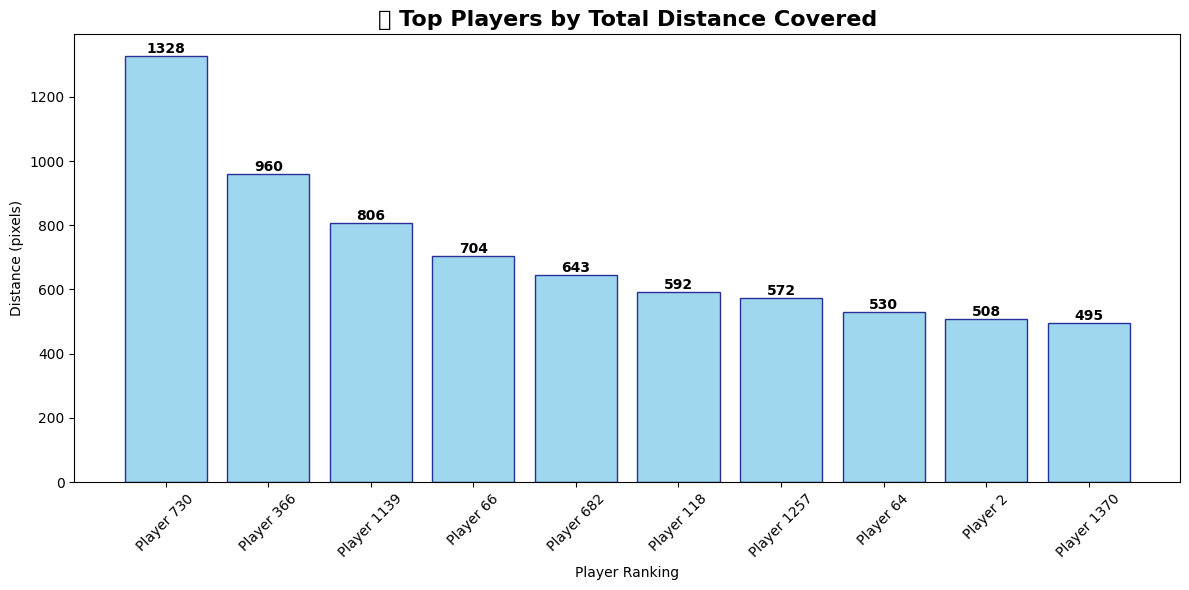

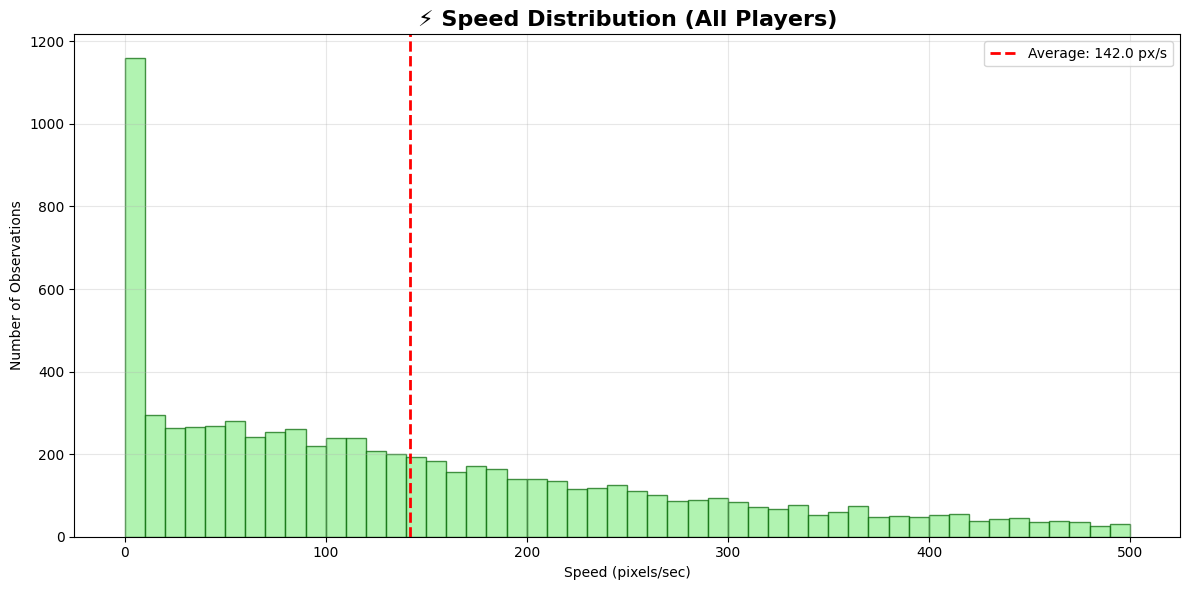

✅ Charts created successfully!


In [12]:
# CELL 10: Create Visualizations
# Charts and graphs showing results

print("📈 Creating visualizations...")

if not summary.empty:
    # 1. Top players by distance
    plt.figure(figsize=(12, 6))
    top_players = summary.nlargest(min(10, len(summary)), "total_distance")

    bars = plt.bar(range(len(top_players)), top_players["total_distance"],
                   color='skyblue', edgecolor='navy', alpha=0.8)

    plt.title("🏃 Top Players by Total Distance Covered", fontsize=16, fontweight='bold')
    plt.xlabel("Player Ranking")
    plt.ylabel("Distance (pixels)")
    plt.xticks(range(len(top_players)),
               [f"Player {int(pid)}" for pid in top_players["id"]],
               rotation=45)

    # Add numbers on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # 2. Speed distribution
    plt.figure(figsize=(12, 6))
    plt.hist(df_filtered["speed"], bins=50, alpha=0.7,
             color='lightgreen', edgecolor='darkgreen')

    plt.title("⚡ Speed Distribution (All Players)", fontsize=16, fontweight='bold')
    plt.xlabel("Speed (pixels/sec)")
    plt.ylabel("Number of Observations")

    avg_speed = df_filtered["speed"].mean()
    plt.axvline(avg_speed, color='red', linestyle='--', linewidth=2,
               label=f'Average: {avg_speed:.1f} px/s')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("✅ Charts created successfully!")

else:
    print("⚠️ No data available for visualization")

🗺️ Creating player movement analysis...
📍 Analyzing Player 730 (most active)


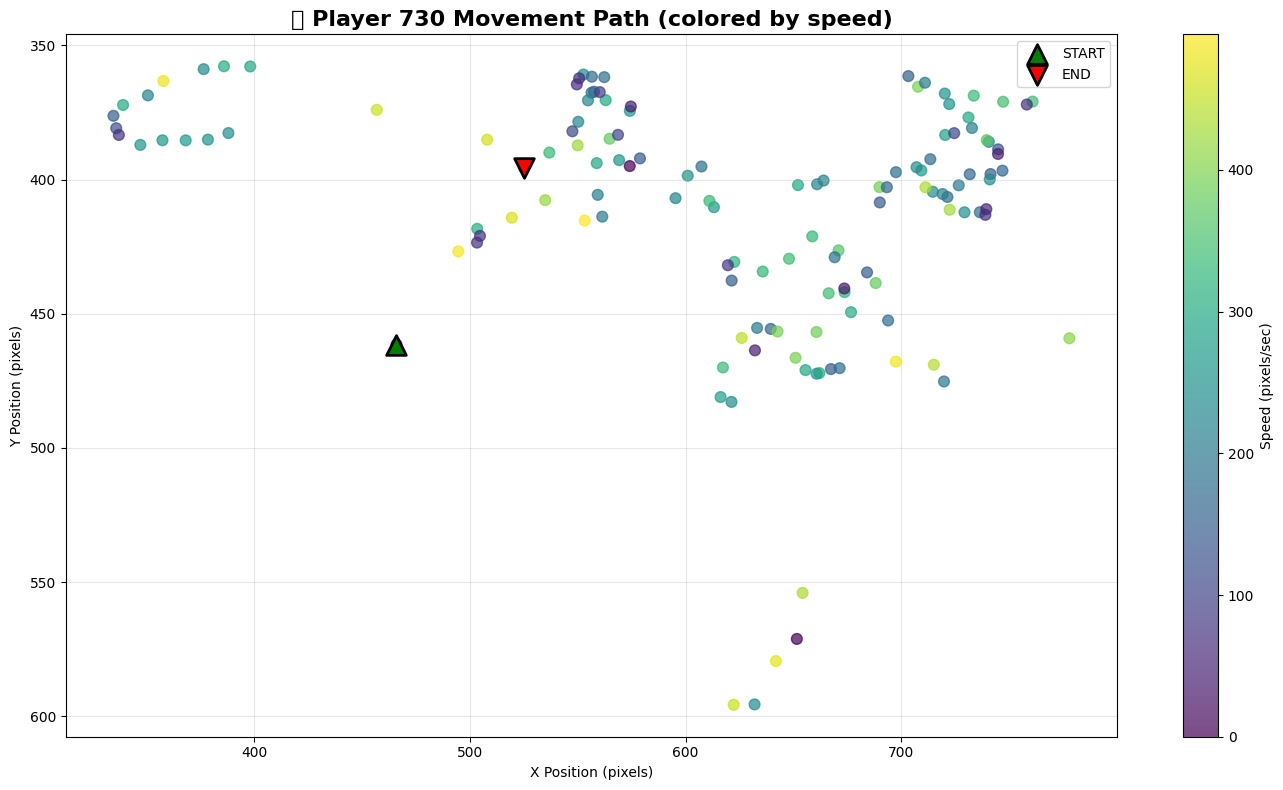

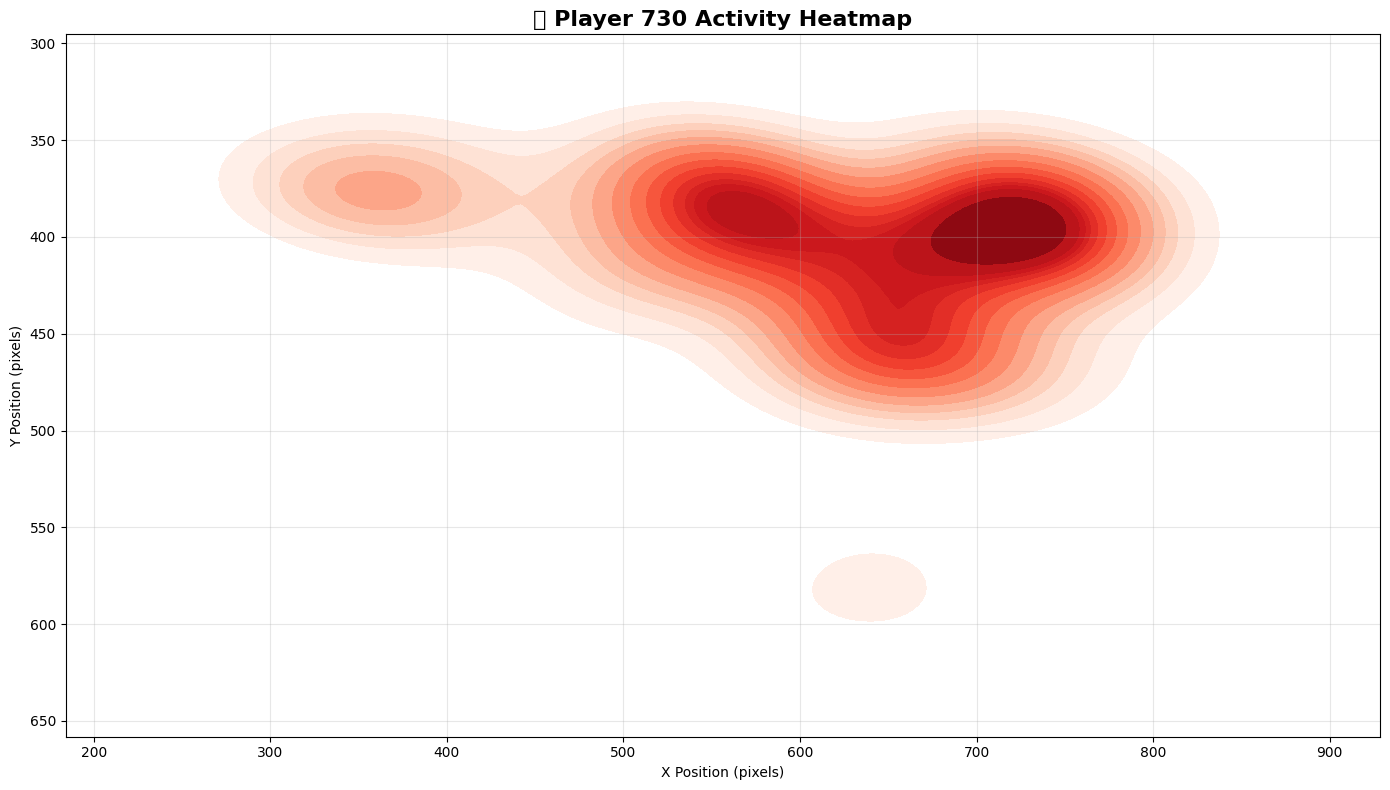

✅ Heatmap created for Player 730!
✅ Movement analysis complete for Player 730!


In [13]:
# CELL 11: Player Movement Analysis
# Show where the most active player moved

print("🗺️ Creating player movement analysis...")

if not summary.empty and not df_filtered.empty:
    # Get most active player
    top_player_id = summary.loc[summary["total_distance"].idxmax(), "id"]
    player_data = df_filtered[df_filtered["id"] == top_player_id]

    if not player_data.empty:
        print(f"📍 Analyzing Player {int(top_player_id)} (most active)")

        # Movement trajectory
        plt.figure(figsize=(14, 8))
        scatter = plt.scatter(player_data["x_center"], player_data["y_center"],
                            c=player_data["speed"], cmap="viridis",
                            s=60, alpha=0.7)

        plt.colorbar(scatter, label="Speed (pixels/sec)")
        plt.title(f"🏃 Player {int(top_player_id)} Movement Path (colored by speed)",
                 fontsize=16, fontweight='bold')
        plt.xlabel("X Position (pixels)")
        plt.ylabel("Y Position (pixels)")

        # Mark start and end
        start = player_data.iloc[0]
        end = player_data.iloc[-1]
        plt.scatter(start["x_center"], start["y_center"],
                   color='green', s=200, marker='^',
                   label='START', edgecolor='black', linewidth=2)
        plt.scatter(end["x_center"], end["y_center"],
                   color='red', s=200, marker='v',
                   label='END', edgecolor='black', linewidth=2)

        plt.legend()
        plt.gca().invert_yaxis()  # Match video coordinates
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # Create heatmap if enough data points
        if len(player_data) > 50:
            plt.figure(figsize=(14, 8))
            try:
                sns.kdeplot(
                    x=player_data["x_center"],
                    y=player_data["y_center"],
                    fill=True,
                    cmap="Reds",
                    thresh=0.1,
                    levels=15
                )
                plt.title(f"🔥 Player {int(top_player_id)} Activity Heatmap",
                         fontsize=16, fontweight='bold')
                plt.xlabel("X Position (pixels)")
                plt.ylabel("Y Position (pixels)")
                plt.gca().invert_yaxis()
                plt.grid(True, alpha=0.3)
                plt.tight_layout()
                plt.show()

                print(f"✅ Heatmap created for Player {int(top_player_id)}!")
            except:
                print("⚠️ Could not create heatmap (insufficient data density)")

        print(f"✅ Movement analysis complete for Player {int(top_player_id)}!")
    else:
        print("⚠️ No movement data available for top player")
else:
    print("⚠️ No players to analyze")

🔥 Creating heatmap for Player 1...
✅ Found 29 data points for Player 1


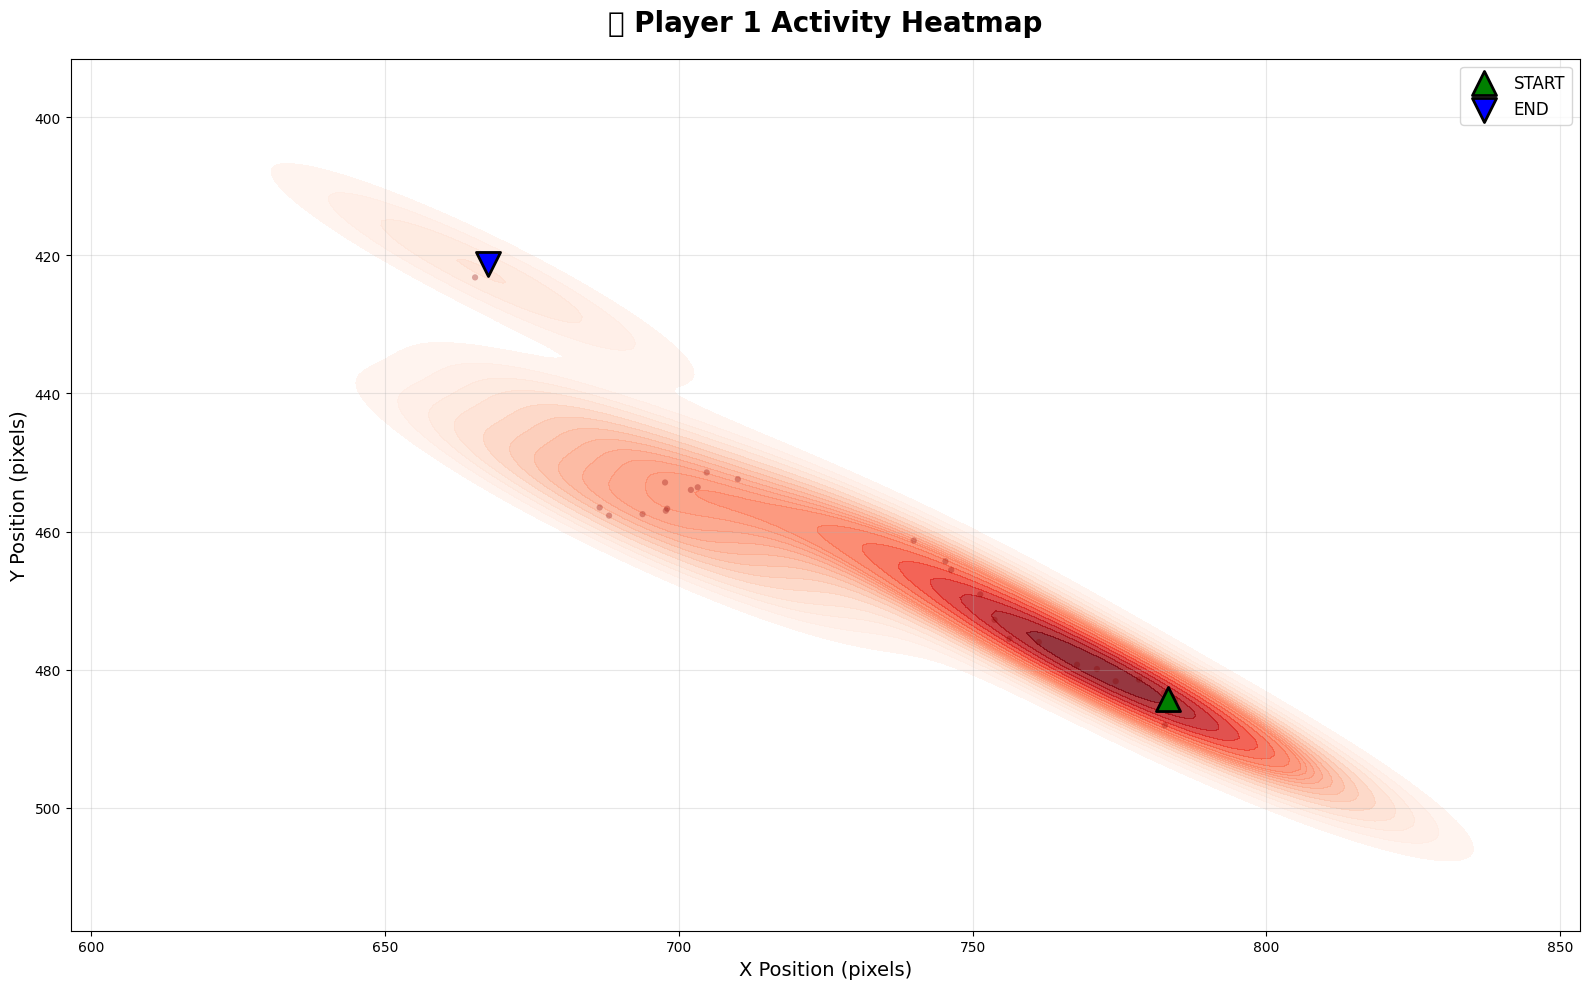

✅ Smooth heatmap created successfully!

📊 PLAYER 1 STATISTICS:
🏃 Total Distance: 83 pixels
⚡ Average Speed: 71.5 px/sec
🚀 Max Speed: 182.0 px/sec
⏱️ Tracking Time: 1.7 seconds
🎬 Frames Tracked: 29.0

📍 ACTIVITY ZONES:
🔄 X Range: 665 - 785 pixels (width: 119)
🔄 Y Range: 421 - 488 pixels (height: 67)
🎯 Most active X position: 665
🎯 Most active Y position: 421


In [14]:
# Create Heatmap for Player 1
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("🔥 Creating heatmap for Player 1...")

# Check if we have data for Player 1
if 'df_filtered' in globals() and not df_filtered.empty:
    player_1_data = df_filtered[df_filtered["id"] == 1]

    if not player_1_data.empty:
        print(f"✅ Found {len(player_1_data)} data points for Player 1")

        # Create the heatmap
        plt.figure(figsize=(16, 10))

        # Method 1: KDE Plot (Smooth heatmap)
        try:
            sns.kdeplot(
                x=player_1_data["x_center"],
                y=player_1_data["y_center"],
                fill=True,
                cmap="Reds",
                thresh=0.05,
                levels=20,
                alpha=0.8
            )

            # Add individual points
            plt.scatter(player_1_data["x_center"], player_1_data["y_center"],
                       alpha=0.3, s=20, c='darkred', edgecolors='none')

            # Mark start and end positions
            start_pos = player_1_data.iloc[0]
            end_pos = player_1_data.iloc[-1]

            plt.scatter(start_pos["x_center"], start_pos["y_center"],
                       color='green', s=300, marker='^',
                       label='START', edgecolor='black', linewidth=2, zorder=5)
            plt.scatter(end_pos["x_center"], end_pos["y_center"],
                       color='blue', s=300, marker='v',
                       label='END', edgecolor='black', linewidth=2, zorder=5)

            plt.title("🔥 Player 1 Activity Heatmap", fontsize=20, fontweight='bold', pad=20)
            plt.xlabel("X Position (pixels)", fontsize=14)
            plt.ylabel("Y Position (pixels)", fontsize=14)
            plt.legend(fontsize=12)
            plt.gca().invert_yaxis()  # Match video coordinates
            plt.grid(True, alpha=0.3)

            # Add colorbar
            plt.tight_layout()
            plt.show()

            print("✅ Smooth heatmap created successfully!")

        except Exception as e:
            print(f"⚠️ Smooth heatmap failed: {e}")
            print("🔄 Trying alternative method...")

            # Method 2: Hexbin (Alternative heatmap)
            plt.figure(figsize=(16, 10))

            hexbin = plt.hexbin(player_1_data["x_center"], player_1_data["y_center"],
                               gridsize=30, cmap='Reds', alpha=0.8)

            plt.colorbar(hexbin, label='Activity Density')

            # Add start and end markers
            plt.scatter(start_pos["x_center"], start_pos["y_center"],
                       color='green', s=300, marker='^',
                       label='START', edgecolor='black', linewidth=2)
            plt.scatter(end_pos["x_center"], end_pos["y_center"],
                       color='blue', s=300, marker='v',
                       label='END', edgecolor='black', linewidth=2)

            plt.title("🔥 Player 1 Activity Heatmap (Hexagonal)", fontsize=20, fontweight='bold')
            plt.xlabel("X Position (pixels)", fontsize=14)
            plt.ylabel("Y Position (pixels)", fontsize=14)
            plt.legend()
            plt.gca().invert_yaxis()
            plt.grid(True, alpha=0.3)
            plt.tight_layout()
            plt.show()

            print("✅ Hexagonal heatmap created successfully!")

        # Show Player 1 statistics
        print(f"\n📊 PLAYER 1 STATISTICS:")
        print("="*40)

        if 'summary' in globals() and not summary.empty:
            player_1_stats = summary[summary["id"] == 1]
            if not player_1_stats.empty:
                stats = player_1_stats.iloc[0]
                print(f"🏃 Total Distance: {stats['total_distance']:.0f} pixels")
                print(f"⚡ Average Speed: {stats['avg_speed']:.1f} px/sec")
                print(f"🚀 Max Speed: {stats['max_speed']:.1f} px/sec")
                print(f"⏱️ Tracking Time: {stats['time_tracked']:.1f} seconds")
                print(f"🎬 Frames Tracked: {stats['frames_tracked']}")

        # Activity zones analysis
        print(f"\n📍 ACTIVITY ZONES:")
        x_min, x_max = player_1_data["x_center"].min(), player_1_data["x_center"].max()
        y_min, y_max = player_1_data["y_center"].min(), player_1_data["y_center"].max()

        print(f"🔄 X Range: {x_min:.0f} - {x_max:.0f} pixels (width: {x_max-x_min:.0f})")
        print(f"🔄 Y Range: {y_min:.0f} - {y_max:.0f} pixels (height: {y_max-y_min:.0f})")
        print(f"🎯 Most active X position: {player_1_data['x_center'].mode().iloc[0]:.0f}")
        print(f"🎯 Most active Y position: {player_1_data['y_center'].mode().iloc[0]:.0f}")

    else:
        print("❌ No data found for Player 1")
        print("Available players:", df_filtered["id"].unique() if 'df_filtered' in globals() else "No data available")

else:
    print("❌ No tracking data available")
    print("Make sure you've run all previous cells first!")

In [15]:
# CELL 12: Final Results and File Download
# Summary and download data files

print("💾 Saving results and preparing downloads...")

# Save data files
if not summary.empty:
    # Save all data files
    summary.to_csv("player_summary.csv", index=False)
    df_metrics.to_csv("player_metrics.csv", index=False)
    df_clean.to_csv("tracking_clean.csv", index=False)

    print("📁 Files saved successfully!")

    # Final summary display
    print("\n" + "="*60)
    print("🏆 FOOTBALL ANALYSIS COMPLETE!")
    print("="*60)

    print(f"\n🎯 KEY FINDINGS:")
    print(f"   👥 Players successfully tracked: {len(summary)}")
    print(f"   🏃 Most active player: Player {int(summary.loc[summary['total_distance'].idxmax(), 'id'])}")
    print(f"   ⚡ Fastest player: Player {int(summary.loc[summary['max_speed'].idxmax(), 'id'])}")
    print(f"   📏 Average distance per player: {summary['total_distance'].mean():.0f} pixels")
    print(f"   🚀 Average maximum speed: {summary['max_speed'].mean():.1f} px/sec")
    print(f"   ⏱️ Average tracking time: {summary['time_tracked'].mean():.1f} seconds")

    # Show top 5 players
    print(f"\n🏅 TOP 5 MOST ACTIVE PLAYERS:")
    top_5 = summary.nlargest(5, "total_distance")[["id", "total_distance", "max_speed"]].round(1)
    for idx, row in top_5.iterrows():
        print(f"   {int(row['id'])}: {row['total_distance']:.0f} pixels, max speed {row['max_speed']:.1f} px/s")

   

print(f"\n🙏 Thank you for using the Football Analysis System!")
print(f"⚽ Your football video has been fully analyzed! ⚽")

💾 Saving results and preparing downloads...
📁 Files saved successfully!

🏆 FOOTBALL ANALYSIS COMPLETE!

🎯 KEY FINDINGS:
   👥 Players successfully tracked: 128
   🏃 Most active player: Player 730
   ⚡ Fastest player: Player 1287
   📏 Average distance per player: 254 pixels
   🚀 Average maximum speed: 365.2 px/sec
   ⏱️ Average tracking time: 2.2 seconds

🏅 TOP 5 MOST ACTIVE PLAYERS:
   730: 1328 pixels, max speed 495.7 px/s
   366: 960 pixels, max speed 486.7 px/s
   1139: 806 pixels, max speed 488.5 px/s
   66: 704 pixels, max speed 472.7 px/s
   682: 643 pixels, max speed 469.9 px/s

🙏 Thank you for using the Football Analysis System!
⚽ Your football video has been fully analyzed! ⚽
